# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Remove predictors with p-values too high and refit the model
* Examine and interpret the model results
* Split data into training and testing sets
* Fit a regression model to the data set using statsmodel library


## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)" then you need to further preprocess your column names.**

In [3]:
#Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [15]:
#Your code here - Manipulate column names
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col
df.columns = [col_formatting(col) for col in df.columns]
list(df.columns)


['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

In [31]:
#Your code here - Define the target and predictors
outcome = 'list_price'
x_cols = df.columns.drop("list_price")



In [32]:
#Your code here - Fit the actual model


from statsmodels.formula.api import ols   
          
predictors = '+'.join(x_cols)  #this one creates the list of independent variables
formula = outcome + "~" + predictors  #the actual formula. Outcome is the dependent var
model = ols(formula=formula, data=df).fit()  #fitting
model.summary()     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     726.2
Date:                Fri, 13 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:16:57   Log-Likelihood:                -54056.
No. Observations:               10870   AIC:                         1.083e+05
Df Residuals:                   10775   BIC:                         1.090e+05
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.2821      1.551     41.435      0.000      61.241      67.323
piece_count                                         75.7184      0.776     97.605      0.000      74.198      77.239
num_reviews                                          6.4270      0.590     10.888      0.000       5.270       7.584
play_star_rating                                     5.2682      0.542      9.717      0.000       4.205       6.331
star_rating                                         -1.4380      0.617     -2.331      0.020      -2.647      -0.229
val_star_rating                                     -8.5504      0.550    -15.545      0.000      -9.628      -7.472
ages_10plus                                        122.9923      5.753     21.378      0.000     111.715     134.270
ages_10_14                                         -23.1648      7.788     -2.975      0.003     -38.430      -7.899
ages_10_16                                         -11.7969      3.528     -3.343      0.001     -18.713      -4.881
ages_10_21                                          55.9674      6.415      8.725      0.000      43.393      68.542
ages_11_16                                         -18.2277      5.058     -3.604      0.000     -28.141      -8.314
ages_12plus                                         70.5837      4.828     14.619      0.000      61.119      80.048
ages_12_16                                         -57.4333      5.882     -9.765      0.000     -68.962     -45.904
ages_14plus                                         24.6493      3.579      6.887      0.000      17.634      31.665
ages_16plus                                         32.9512      5.251      6.275      0.000      22.658      43.245
ages_1half_3                                        -9.0486      2.087     -4.336      0.000     -13.139      -4.958
ages_1half_5                                        -4.1380      2.605     -1.588      0.112      -9.244       0.969
ages_2_5                                            14.9724      1.459     10.260      0.000      12.112      17.833
ages_4plus                                         -18.5801      5.504     -3.376      0.001     -29.370      -7.791
ages_4_7                                            -6.1664      2.909     -2.120      0.034     -11.868      -0.465
ages_4_99                                           -3.0337      3.138     -0.967      0.334      -9.185       3.118
ages_5plus                                          -9.6179      2.705     -3.556      0.000     -14.920      -4.316
ages_5_12                                          -34.9818      2.739    -12.771      0.000     -40.351     -29.613
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [33]:
#Your code here - Remove features which do not appear to be statistically relevant

summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|']<0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

103 76
['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,64.2821,1.551,41.435,0.00,61.241,67.323
piece_count,75.7184,0.776,97.605,0.00,74.198,77.239
num_reviews,6.4270,0.590,10.888,0.00,5.270,7.584
play_star_rating,5.2682,0.542,9.717,0.00,4.205,6.331
star_rating,-1.4380,0.617,-2.331,0.02,-2.647,-0.229


In [34]:
#Your code here - Refit the model

predictors = '+'.join(x_cols)  #this one creates the list of independent variables
formula = outcome + "~" + predictors  #the actual formula. Outcome is the dependent var
model = ols(formula=formula, data=df).fit()  #fitting
model.summary()     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     910.4
Date:                Fri, 13 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:16:59   Log-Likelihood:                -54063.
No. Observations:               10870   AIC:                         1.083e+05
Df Residuals:                   10794   BIC:                         1.088e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.7562      2.106     30.747      0.000      60.628      68.884
piece_count                                         75.7688      0.763     99.312      0.000      74.273      77.264
num_reviews                                          6.5022      0.585     11.111      0.000       5.355       7.649
play_star_rating                                     5.4112      0.531     10.190      0.000       4.370       6.452
star_rating                                         -1.4588      0.606     -2.406      0.016      -2.647      -0.271
val_star_rating                                     -8.4947      0.528    -16.084      0.000      -9.530      -7.459
ages_10plus                                        128.2005      6.586     19.465      0.000     115.291     141.110
ages_10_14                                         -19.3577      8.201     -2.360      0.018     -35.434      -3.281
ages_10_16                                          -8.7326      3.680     -2.373      0.018     -15.947      -1.519
ages_10_21                                          61.6708      7.062      8.733      0.000      47.829      75.513
ages_11_16                                         -15.5409      5.126     -3.032      0.002     -25.590      -5.492
ages_12plus                                         75.0700      5.737     13.085      0.000      63.824      86.316
ages_12_16                                         -54.0781      6.335     -8.536      0.000     -66.496     -41.660
ages_14plus                                         28.5356      4.315      6.613      0.000      20.078      36.993
ages_16plus                                         36.2814      6.010      6.037      0.000      24.501      48.061
ages_1half_3                                        -3.6613      3.116     -1.175      0.240      -9.769       2.446
ages_2_5                                            20.0271      2.309      8.673      0.000      15.501      24.553
ages_4plus                                         -16.2515      8.435     -1.927      0.054     -32.786       0.283
ages_4_7                                            -2.5732      2.415     -1.065      0.287      -7.307       2.161
ages_5plus                                          -8.3651      2.773     -3.017      0.003     -13.801      -2.930
ages_5_12                                          -30.5511      2.755    -11.090      0.000     -35.951     -25.151
ages_6plus                                         -22.6151      5.048     -4.480      0.000     -32.510     -12.721
ages_6_12                                          -17.8101      2.201     -8.093      0.000     -22.124     -13.497
ages_7_12                                

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [35]:
#Your code here - Continue to refine the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|']<0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

77 69
['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,64.7562,2.106,30.747,0.000,60.628,68.884
piece_count,75.7688,0.763,99.312,0.000,74.273,77.264
num_reviews,6.5022,0.585,11.111,0.000,5.355,7.649
play_star_rating,5.4112,0.531,10.190,0.000,4.370,6.452
star_rating,-1.4588,0.606,-2.406,0.016,-2.647,-0.271


In [36]:
predictors = '+'.join(x_cols)  #this one creates the list of independent variables
formula = outcome + "~" + predictors  #the actual formula. Outcome is the dependent var
model = ols(formula=formula, data=df).fit()  #fitting
model.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1003.
Date:                Fri, 13 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:17:01   Log-Likelihood:                -54070.
No. Observations:               10870   AIC:                         1.083e+05
Df Residuals:                   10801   BIC:                         1.088e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.6758      1.215     52.404      0.000      61.294      66.058
piece_count                                         75.8262      0.763     99.417      0.000      74.331      77.321
num_reviews                                          6.1455      0.552     11.142      0.000       5.064       7.227
play_star_rating                                     5.5014      0.529     10.391      0.000       4.464       6.539
star_rating                                         -1.4314      0.601     -2.382      0.017      -2.609      -0.253
val_star_rating                                     -8.6042      0.523    -16.437      0.000      -9.630      -7.578
ages_10plus                                        129.5614      6.451     20.085      0.000     116.917     142.206
ages_10_14                                         -17.4870      8.072     -2.166      0.030     -33.309      -1.665
ages_10_16                                          -6.5432      3.331     -1.964      0.050     -13.072      -0.014
ages_10_21                                          62.8400      6.969      9.017      0.000      49.179      76.501
ages_11_16                                         -13.3548      4.886     -2.733      0.006     -22.932      -3.777
ages_12plus                                         76.6355      5.630     13.613      0.000      65.600      87.671
ages_12_16                                         -51.7495      6.165     -8.393      0.000     -63.835     -39.664
ages_14plus                                         31.2107      4.103      7.607      0.000      23.168      39.253
ages_16plus                                         38.9612      5.868      6.639      0.000      27.458      50.464
ages_2_5                                            21.9668      1.641     13.383      0.000      18.749      25.184
ages_5plus                                          -7.4825      2.645     -2.829      0.005     -12.667      -2.298
ages_5_12                                          -28.2777      2.274    -12.437      0.000     -32.734     -23.821
ages_6plus                                         -20.2011      4.793     -4.214      0.000     -29.597     -10.805
ages_6_12                                          -15.4143      1.549     -9.954      0.000     -18.450     -12.379
ages_7_12                                          -14.4029      1.845     -7.804      0.000     -18.020     -10.785
ages_7_14                                          -10.7496      1.639     -6.560      0.000     -13.962      -7.537
ages_8plus                                          19.1774      4.312      4.448      0.000      10.725      27.629
ages_8_12                                

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extend of this problem.

In [37]:
#Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))


/Users/kaan/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.601239274272956),
 ('num_reviews', 2.620700654644066),
 ('play_star_rating', 2.4523421001935852),
 ('star_rating', 3.1832799286370403),
 ('val_star_rating', 2.4140234278411783),
 ('ages_10plus', 17.844818526709666),
 ('ages_10_14', 1.1025817480103028),
 ('ages_10_16', 1.1909612992174576),
 ('ages_10_21', 7.176759059517397),
 ('ages_11_16', 1.1664909201336855),
 ('ages_12plus', 7.281472861400529),
 ('ages_12_16', 1.2073556456541634),
 ('ages_14plus', 2.2738119699878157),
 ('ages_16plus', 9.660105566783917),
 ('ages_2_5', 1.222402406057062),
 ('ages_5plus', inf),
 ('ages_5_12', 3.269196062473018),
 ('ages_6plus', 2.673351610934489),
 ('ages_6_12', 1.996120074501607),
 ('ages_7_12', 1.518620067264466),
 ('ages_7_14', 1.996379642313055),
 ('ages_8plus', 3.3451908812168054),
 ('ages_8_12', 1.29239038079733),
 ('ages_8_14', 2.0864433036128),
 ('ages_9plus', 1.5569094449207823),
 ('ages_9_12', 1.0220202722173097),
 ('ages_9_14', 1.9594481348830812),
 ('theme_name_Architectu

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [38]:
#Your code here - Subset features based on multicollinearity
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))



69 60


In [39]:
predictors = '+'.join(x_cols)  #this one creates the list of independent variables
formula = outcome + "~" + predictors  #the actual formula. Outcome is the dependent var
model = ols(formula=formula, data=df).fit()  #fitting
model.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     1009.
Date:                Fri, 13 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:23:58   Log-Likelihood:                -54628.
No. Observations:               10870   AIC:                         1.094e+05
Df Residuals:                   10809   BIC:                         1.098e+05
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           70.1909      0.997     70.435      0.000      68.238      72.144
piece_count                                         77.5315      0.603    128.572      0.000      76.349      78.714
num_reviews                                          4.4632      0.539      8.285      0.000       3.407       5.519
play_star_rating                                     7.6308      0.481     15.881      0.000       6.689       8.573
star_rating                                         -2.6308      0.610     -4.312      0.000      -3.827      -1.435
val_star_rating                                     -9.8421      0.544    -18.106      0.000     -10.908      -8.777
ages_10_14                                         -37.4300      8.409     -4.451      0.000     -53.914     -20.946
ages_10_16                                         -17.4764      3.254     -5.370      0.000     -23.855     -11.097
ages_11_16                                         -27.7462      4.795     -5.787      0.000     -37.145     -18.348
ages_12_16                                         -67.6491      6.044    -11.193      0.000     -79.496     -55.802
ages_14plus                                          6.2982      3.458      1.821      0.069      -0.480      13.076
ages_2_5                                            15.6990      1.577      9.958      0.000      12.609      18.789
ages_5_12                                          -36.2088      2.308    -15.691      0.000     -40.732     -31.685
ages_6plus                                         -28.1566      4.987     -5.647      0.000     -37.931     -18.382
ages_6_12                                          -24.8496      1.453    -17.103      0.000     -27.698     -22.002
ages_7_12                                          -23.0129      1.799    -12.794      0.000     -26.539     -19.487
ages_7_14                                          -19.4575      1.574    -12.360      0.000     -22.543     -16.372
ages_8plus                                          -1.1548      3.897     -0.296      0.767      -8.793       6.483
ages_8_12                                          -22.2448      2.281     -9.751      0.000     -26.716     -17.773
ages_8_14                                          -20.4029      1.656    -12.320      0.000     -23.649     -17.157
ages_9plus                                          16.7149      8.997      1.858      0.063      -0.921      34.351
ages_9_12                                          -32.5305      5.669     -5.739      0.000     -43.642     -21.419
ages_9_14                                          -18.3776      2.265     -8.112      0.000     -22.818     -13.937
theme_name_BOOST                         

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

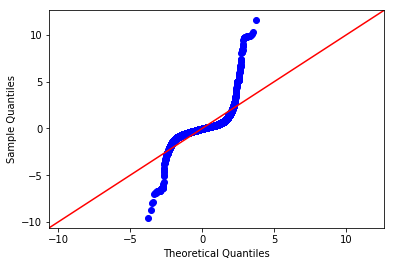

In [40]:
# Your code here - Check that the residuals are normally distributed

import statsmodels.api as sm
import scipy.stats as stats

fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

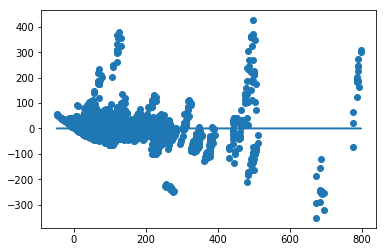

In [41]:
#Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(df[x_cols]), model.resid)
plt.plot(model.predict(df[x_cols]), [0 for i in range(len(df))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confiding the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least 2 additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

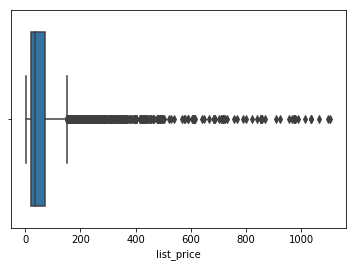

In [44]:
#Your code here - Check for outliers
sns.boxplot(df.list_price)


In [52]:
df=df[df.list_price<100]

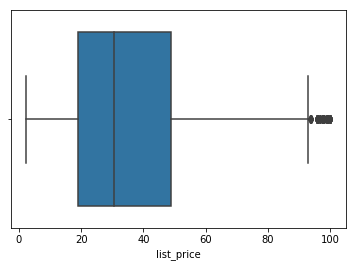

In [53]:
sns.boxplot(df.list_price)

In [54]:
#Your code here - Rerun the model with extreme outliers removed
predictors = '+'.join(x_cols)  #this one creates the list of independent variables
formula = outcome + "~" + predictors  #the actual formula. Outcome is the dependent var
model = ols(formula=formula, data=df).fit()  #fitting
model.summary() 


/Users/kaan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     642.9
Date:                Fri, 13 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:32:32   Log-Likelihood:                -33727.
No. Observations:                8995   AIC:                         6.756e+04
Df Residuals:                    8940   BIC:                         6.795e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           59.3379      0.414    143.436      0.000      58.527      60.149
piece_count                                         71.4103      0.624    114.374      0.000      70.186      72.634
num_reviews                                          0.9301      0.307      3.033      0.002       0.329       1.531
play_star_rating                                     3.3395      0.143     23.361      0.000       3.059       3.620
star_rating                                         -1.1236      0.178     -6.330      0.000      -1.472      -0.776
val_star_rating                                     -3.5434      0.159    -22.300      0.000      -3.855      -3.232
ages_10_14                                          -3.3284      2.406     -1.384      0.167      -8.044       1.387
ages_10_16                                          -4.7335      2.116     -2.237      0.025      -8.882      -0.585
ages_11_16                                        9.551e-14   8.24e-15     11.590      0.000    7.94e-14    1.12e-13
ages_12_16                                       -3.922e-14    7.5e-15     -5.228      0.000   -5.39e-14   -2.45e-14
ages_14plus                                      -1.439e-14    5.5e-15     -2.617      0.009   -2.52e-14   -3.61e-15
ages_2_5                                            18.9767      0.458     41.465      0.000      18.080      19.874
ages_5_12                                          -15.5752      0.743    -20.951      0.000     -17.033     -14.118
ages_6plus                                         -23.4405      1.418    -16.533      0.000     -26.220     -20.661
ages_6_12                                          -10.5418      0.434    -24.297      0.000     -11.392      -9.691
ages_7_12                                           -6.8137      0.539    -12.633      0.000      -7.871      -5.756
ages_7_14                                           -7.0101      0.461    -15.202      0.000      -7.914      -6.106
ages_8plus                                           7.6147      1.191      6.395      0.000       5.280       9.949
ages_8_12                                           -3.6106      0.734     -4.922      0.000      -5.049      -2.173
ages_8_14                                           -1.7425      0.539     -3.231      0.001      -2.799      -0.685
ages_9plus                                          -0.0939      2.632     -0.036      0.972      -5.253       5.065
ages_9_12                                           -8.1037      1.645     -4.928      0.000     -11.327      -4.880
ages_9_14                                           -3.6119      0.942     -3.835      0.000      -5.458      -1.766
theme_name_BOOST                         

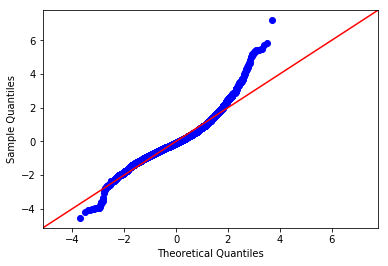

In [55]:
#Your code here - Check normality and homoscedasticity assumptions
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)


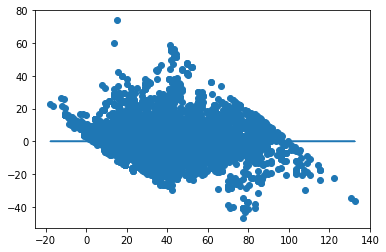

In [56]:
#Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(df[x_cols]), model.resid)
plt.plot(model.predict(df[x_cols]), [0 for i in range(len(df))])

/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


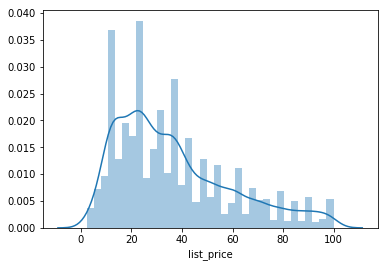

In [59]:
sns.distplot(df.list_price)

In [61]:
import numpy as np
df.list_price = np.log1p(df.list_price)

/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


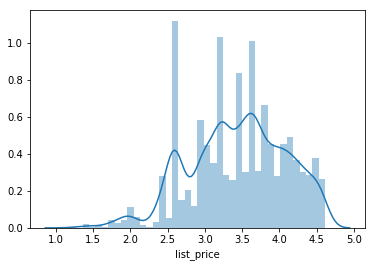

In [64]:
sns.distplot(df.list_price)
# this seem worse than the earlier version

In [63]:
predictors = '+'.join(x_cols)  #this one creates the list of independent variables
formula = outcome + "~" + predictors  #the actual formula. Outcome is the dependent var
model = ols(formula=formula, data=df).fit()  #fitting
model.summary() 

/Users/kaan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     458.3
Date:                Fri, 13 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:40:07   Log-Likelihood:                -2803.4
No. Observations:                8995   AIC:                             5717.
Df Residuals:                    8940   BIC:                             6108.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.9789      0.013    299.306      0.000       3.953       4.005
piece_count                                          1.8594      0.020     92.677      0.000       1.820       1.899
num_reviews                                         -0.0707      0.010     -7.178      0.000      -0.090      -0.051
play_star_rating                                     0.1226      0.005     26.699      0.000       0.114       0.132
star_rating                                         -0.0582      0.006    -10.197      0.000      -0.069      -0.047
val_star_rating                                     -0.0936      0.005    -18.331      0.000      -0.104      -0.084
ages_10_14                                          -0.0516      0.077     -0.668      0.504      -0.203       0.100
ages_10_16                                          -0.1214      0.068     -1.785      0.074      -0.255       0.012
ages_11_16                                        2.262e-15   2.65e-16      8.543      0.000    1.74e-15    2.78e-15
ages_12_16                                       -1.432e-15   2.41e-16     -5.941      0.000   -1.91e-15    -9.6e-16
ages_14plus                                      -4.649e-16   1.77e-16     -2.631      0.009   -8.11e-16   -1.18e-16
ages_2_5                                             0.5852      0.015     39.790      0.000       0.556       0.614
ages_5_12                                           -0.4600      0.024    -19.257      0.000      -0.507      -0.413
ages_6plus                                          -0.7814      0.046    -17.150      0.000      -0.871      -0.692
ages_6_12                                           -0.2634      0.014    -18.896      0.000      -0.291      -0.236
ages_7_12                                           -0.0587      0.017     -3.387      0.001      -0.093      -0.025
ages_7_14                                           -0.0833      0.015     -5.622      0.000      -0.112      -0.054
ages_8plus                                           0.2684      0.038      7.014      0.000       0.193       0.343
ages_8_12                                           -0.0014      0.024     -0.058      0.954      -0.048       0.045
ages_8_14                                            0.0145      0.017      0.837      0.403      -0.019       0.048
ages_9plus                                          -0.1117      0.085     -1.321      0.187      -0.278       0.054
ages_9_12                                           -0.2641      0.053     -4.998      0.000      -0.368      -0.161
ages_9_14                                           -0.1877      0.030     -6.202      0.000      -0.247      -0.128
theme_name_BOOST                         

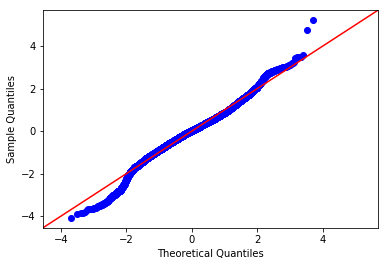

In [65]:
#Your code here - Check normality and homoscedasticity assumptions
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)


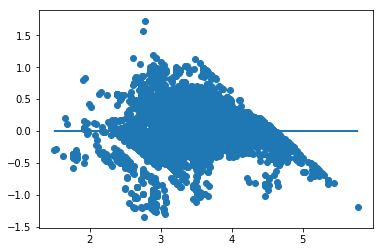

In [66]:
plt.scatter(model.predict(df[x_cols]), model.resid)
plt.plot(model.predict(df[x_cols]), [0 for i in range(len(df))])

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches and make ongoing refinements. These choices depend on the context and specific use cases. 